In [53]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [94]:
import sys, re, time, math, multiprocessing, os
from numpy import array
from itertools import combinations, combinations_with_replacement, permutations, product
import numpy as np

In [105]:
def make_kmer_list(k, alphabet):
    """
    Generate kmer list.
    """
    if k < 0:
        print('Error, k must be an inter and larger than 0.')
    kmers = []
    for i in range(1, k + 1):
        if len(kmers) == 0:
            kmers = list(alphabet)
        else:
            new_kmers = []
            for kmer in kmers:
                for c in alphabet:
                    new_kmers.append(kmer + c)

            kmers = new_kmers

    return kmers



def frequency(tol_str,tol_str_2, tar_str,k):
    """Generate the frequency of tar_str in tol_str.

    :param tol_str: mother string.
    :param tar_str: substring.
    """
    i, j, tar_count = (0, 0, 0)
    len_tol_str = len(tol_str)
    len_tar_str = len(tar_str)/2
    while i < len_tol_str and j < len_tar_str:
        if tol_str[i] == tar_str[j] and tol_str_2[i] == tar_str[k+j]:
            i += 1
            j += 1
            if j >= len_tar_str:
                tar_count += 1
                i = i - j + 1
                j = 0
        else:
            i = i - j + 1
            j = 0

    return tar_count

def _cmp(a, b):
    return (a > b) - (a < b)

def get_seq(filename, alphabet):
    seqs, cats = [], []
    for line in open(filename,'r'):
            seq, struct, cat = line.split('\t')
            #seqs.append(seq.replace('T','U'))
            seqs.append(seq)
            #cats.append(cat.replace('\n',''))
    return seqs

def get_struct(filename, alphabet,thresh_value=0.25):
    structs = []
    for line in open(filename,'r'):
            seq, struct, cat = line.split('\t')
            #seqs.append(seq.replace('T','U'))
            struct_last = ''
            struct = struct.replace('[','').replace(']','').split(',')
            for num in struct:
                try:
                    a = float(num.strip().replace("'",''))
                except:
                    struct_last+='N'
                    continue
                if a>=thresh_value:
                    struct_last+='M'
                else:
                    struct_last+='L'
            structs.append(struct_last)
    return structs
    

def get_label(filename, alphabet):
    seqs, cats = [], []
    for line in open(filename,'r'):
            seq, struct, cat = line.split('\t')
            #seqs.append(seq.replace('T','U'))
            #seqs.append(seq)
            cats.append(cat.replace('\n',''))
    return cats


def make_kmer_vector(k, alphabet, filename, revcomp=False,null_flag=True,thresh_value=0.25):
    """Generate kmer vector."""
    seqs = get_seq(filename, alphabet=alphabet)
    structs = get_struct(filename, alphabet=alphabet,thresh_value=thresh_value)
    if revcomp:
        if re.search('[^acgtACGT]', ''.join(alphabet)) is not None:
            sys.exit('Error, Only DNA sequence can be reverse compliment.')
    vector = []
    kmer_list_seq = make_kmer_list(k, alphabet)
    if null_flag:
        kmer_list_struct = make_kmer_list(k,'NML')
    else:
        kmer_list_struct = make_kmer_list(k,'ML')
    kmer_list = []
    for seq_uniq in kmer_list_seq:
        for struct_uniq in kmer_list_struct:
            kmer_list.append(seq_uniq+struct_uniq)
    
    for seq,struct in zip(seqs,structs):
        if null_flag:
            pass
        else:
            seq_new,struct_new = '',''
            for i in range(len(seq)):
                if struct[i]!='N':
                    seq_new+=seq[i]
                    struct_new+=struct[i]
            seq,struct=seq_new,struct_new
        #print(seq)
        #print(struct)
        count_sum = 0
        kmer_count = {}
        for kmer in kmer_list:
            temp_count = frequency(seq, struct, kmer,k)
            if kmer not in kmer_count:
                kmer_count[kmer] = 0
            kmer_count[kmer] += temp_count
            count_sum += temp_count

        count_vec = [kmer_count[kmer] for kmer in kmer_list]
        #count_vec = [round(float(e) / count_sum, 8) for e in count_vec]
        count_vec = [round(float(e)/(len(seq)-k+1), 6) for e in count_vec]
        vector.append(count_vec)
    return vector


In [106]:
RNA="ACGT"
data="C:/Users/sunnyflyingsky/Desktop/ERM_full_all_str.txt"
kmer=2
null_flag = False
thresh_value = 0.25

In [107]:
res = make_kmer_vector(k=kmer, alphabet=RNA, filename=data, revcomp=False, null_flag=null_flag,thresh_value=thresh_value)

In [61]:
cats = get_label(filename=data, alphabet=RNA)
for i in range(0, len(cats)):
    cats[i] = int(cats[i])

In [63]:
res[1]

[0.002523,
 0.0,
 0.0,
 0.0,
 0.027387,
 0.010811,
 0.00036,
 0.011892,
 0.016216,
 0.00036,
 0.0,
 0.0,
 0.0,
 0.008649,
 0.012973,
 0.0,
 0.007928,
 0.023063,
 0.001802,
 0.0,
 0.0,
 0.0,
 0.012973,
 0.017297,
 0.0,
 0.01009,
 0.02955,
 0.001441,
 0.0,
 0.0,
 0.0,
 0.024865,
 0.014054,
 0.0,
 0.007928,
 0.015495,
 0.000721,
 0.0,
 0.0,
 0.0,
 0.015495,
 0.012973,
 0.0,
 0.016937,
 0.02955,
 0.0,
 0.0,
 0.0,
 0.0,
 0.002883,
 0.004324,
 0.0,
 0.01009,
 0.037838,
 0.001081,
 0.0,
 0.0,
 0.0,
 0.001802,
 0.002523,
 0.0,
 0.003964,
 0.011532,
 0.001441,
 0.0,
 0.0,
 0.0,
 0.009009,
 0.011892,
 0.0,
 0.018018,
 0.032793,
 0.001441,
 0.0,
 0.0,
 0.0,
 0.017297,
 0.009369,
 0.0,
 0.016577,
 0.023423,
 0.001081,
 0.0,
 0.0,
 0.0,
 0.003604,
 0.006847,
 0.0,
 0.009009,
 0.02991,
 0.002883,
 0.0,
 0.000721,
 0.0,
 0.005405,
 0.009009,
 0.0,
 0.007928,
 0.038919,
 0.001441,
 0.0,
 0.0,
 0.00036,
 0.007928,
 0.010811,
 0.0,
 0.01009,
 0.024144,
 0.001081,
 0.0,
 0.0,
 0.0,
 0.015135,
 0.009009,


In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#y_resampled_smote = le.fit_transform(cats)
X_array = np.array(res)

In [68]:
import pandas as pd
kmer_list_seq = make_kmer_list(kmer, RNA)
kmer_list_struct = make_kmer_list(kmer,'NML')
kmer_list = []
for seq_uniq in kmer_list_seq:
    for struct_uniq in kmer_list_struct:
        kmer_list.append(seq_uniq+struct_uniq)

X = pd.DataFrame(res,columns=kmer_list)
y = np.array(cats)

In [69]:
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 787), (1, 787)]


In [70]:
pos= np.count_nonzero(y == 1)
neg = np.count_nonzero(y == 0)
All=int(pos)+int(neg)
if int(neg-pos)>=0:
    Weight=float(neg/pos)
else:
    Weight=float(pos/neg)

In [71]:
from sklearn import model_selection
Train_X, Test_X, Train_y, Test_y = model_selection.train_test_split(X, y, stratify=y, test_size=0.2,random_state=2020)
#Train_X, Val_X, Train_y, Val_y = model_selection.train_test_split(Train_X, Train_y, stratify=Train_y, test_size=0.25,random_state=2020)


In [72]:
Train_X.shape

(1259, 144)

In [74]:
#from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [75]:
#rfc = RandomForestClassifier(random_state=2020, n_estimators=200, class_weight='balanced')
#Classifier = RandomForestClassifier(random_state=2020, n_estimators=200, class_weight='balanced')
Classifier = XGBClassifier(random_state=2020,n_estimators=100,eta=0.1, max_depth=6, eval_metric=['logloss','auc','error'],use_label_encoder=False, scale_pos_weight = float(Weight))

In [76]:
model=Classifier.fit(Train_X, Train_y)

In [77]:
print("Test mean accuracy: {0}".format(model.score(Test_X, Test_y)))
y_pred = model.predict(Test_X)
print(classification_report(Test_y, y_pred))

Test mean accuracy: 0.7746031746031746
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       158
           1       0.78      0.76      0.77       157

    accuracy                           0.77       315
   macro avg       0.77      0.77      0.77       315
weighted avg       0.77      0.77      0.77       315



In [78]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [79]:
cv = StratifiedKFold(n_splits=5)  # 导入该模型，后面将数据划分5份

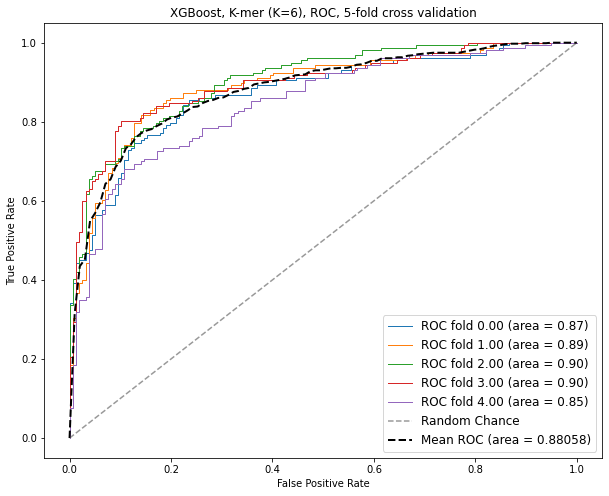

In [80]:
plt.figure(figsize=(10, 8))
# 画平均ROC曲线的两个参数
mean_tpr = 0.0  # 用来记录画平均ROC曲线的信息
mean_fpr = np.linspace(0, 1, 100)
cnt = 0
for i, (train, test) in enumerate(cv.split(X_array, y)):  # 利用模型划分数据集和目标变量 为一一对应的下标
    cnt += 1
    y_score = Classifier.fit(X_array[train], y[train]).predict_proba(X_array[test])  # 训练模型后预测每条样本得到两种结果的概率
    fpr, tpr, thresholds = roc_curve(y[test], y_score[:, 1])  # 该函数得到伪正例、真正例、阈值，这里只使用前两个

    mean_tpr += np.interp(mean_fpr, fpr, tpr)  # 插值函数 interp(x坐标,每次x增加距离,y坐标)  累计每次循环的总值后面求平均值
    mean_tpr[0] = 0.0  # 将第一个真正例=0 以0为起点

    roc_auc = auc(fpr, tpr)  # 求auc面积
    
    plt.plot(fpr, tpr, lw=1, label='ROC fold {0:.2f} (area = {1:.2f})'.format(i, roc_auc))  # 画出当前分割数据的ROC曲线
    #plt.plot(fpr, tpr, lw=1)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Chance')  # 画对角线

mean_tpr /= cnt  # 求数组的平均值
mean_tpr[-1] = 1.0  # 坐标最后一个点为（1,1）  以1为终点
mean_auc = auc(mean_fpr, mean_tpr)



plt.plot(mean_fpr, mean_tpr, 'k--', label='Mean ROC (area = {0:.5f})'.format(mean_auc), lw=2)

plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，设置宽一点，以免和边缘重合，可以更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
plt.title('XGBoost, K-mer (K=6), ROC, 5-fold cross validation')
plt.legend(loc="lower right", prop={'size': 12})

plt.show()


In [81]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=5, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.figure(figsize=(10, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower left") #best
    return plt


from sklearn.model_selection import ShuffleSplit

title = "Learning Curves " #(SVM, RBF kernel, $\gamma=0.001$)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=2020)
#estimator = RandomForestClassifier(silent=True)  # 建模

plot_learning_curve(Classifier, title, X_resampled_smote, y_resampled_smote, (0.5, 1.01), cv=cv, n_jobs=5)
#plt.savefig('lc1.png')
plt.show()

NameError: name 'X_resampled_smote' is not defined

In [83]:
import shap

In [84]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


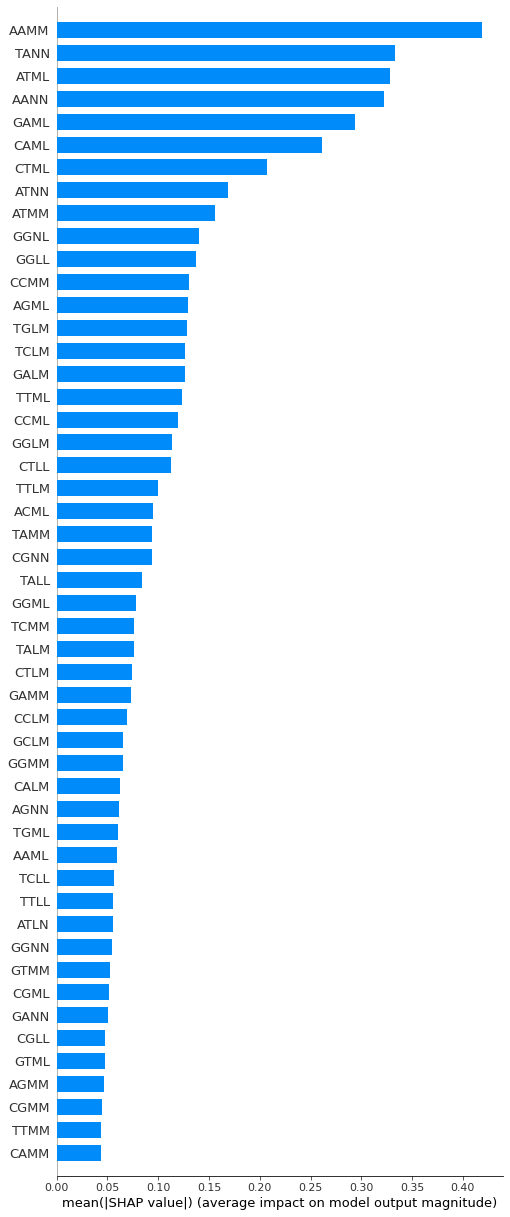

In [85]:
shap.summary_plot(shap_values, X, plot_type="bar", max_display=50)

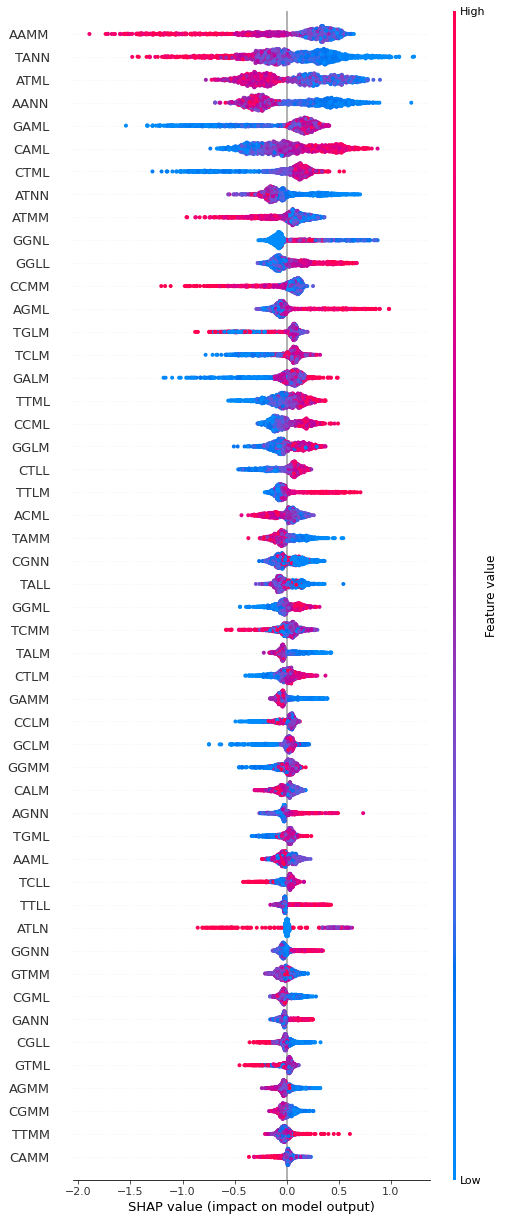

In [86]:
shap.summary_plot(shap_values, X, max_display=50)

In [87]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = X.columns
feature_importance['importance'] = np.abs(shap_values).mean(0)
feature_importance.sort_values('importance', ascending=False)

,feature,importance
4,AAMM,0.418727
108,TANN,0.332971
32,ATML,0.328148
0,AANN,0.322479
77,GAML,0.294108
...,...,...
56,CGNL,0.000000
12,ACMN,0.000000
11,ACNL,0.000000
118,TCNM,0.000000


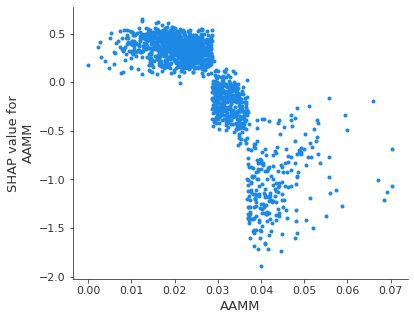

In [89]:
shap.dependence_plot('AAMM', shap_values, X, interaction_index=None)

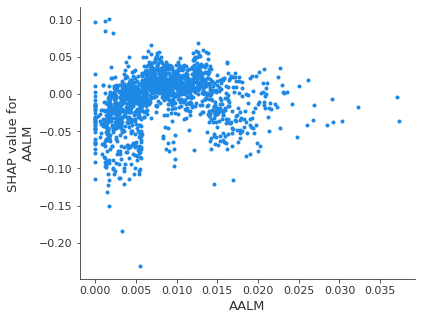

In [91]:
shap.dependence_plot('AALM', shap_values, X, interaction_index=None)

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
#设置绘图风格
plt.style.use('ggplot')
#处理中文乱码
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#坐标轴负号的处理
plt.rcParams['axes.unicode_minus']=False
# 读取数据
tips=pd.read_table('./4_data_pos_all/ERM_len.txt',sep='\t')

FileNotFoundError: [Errno 2] File ./4_data_pos_all/ERM_len.txt does not exist: './4_data_pos_all/ERM_len.txt'

In [64]:
tips

,utr3,type,name
0,1115,pos,ERM
1,2452,pos,ERM
2,979,pos,ERM
3,1210,pos,ERM
4,576,pos,ERM
...,...,...,...
3083,3,neg,G3BP1_A
3084,3,neg,G3BP1_A
3085,677,neg,G3BP1_A
3086,517,neg,G3BP1_A


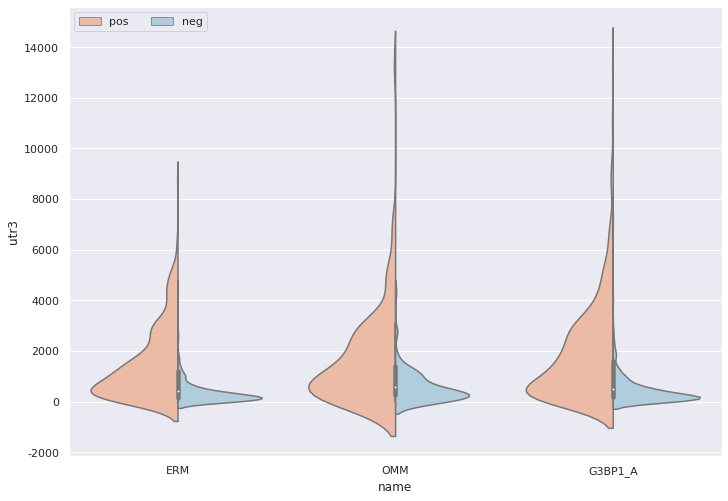

In [66]:
# 绘制分组小提琴图
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x = "name", # 指定x轴的数据
               y = "utr3", # 指定y轴的数据
               hue = "type", # 指定分组变量
               data = tips, # 指定绘图的数据集
               #order = ['Thur','Fri','Sat','Sun'], # 指定x轴刻度标签的顺序
               scale = 'count', # 以男女客户数调节小提琴图左右的宽度
               split = True, # 将小提琴图从中间割裂开，形成不同的密度曲线；
               palette = 'RdBu' # 指定不同性别对应的颜色（因为hue参数为设置为性别变量）
              )
# 添加图形标题
#plt.title('每天不同性别客户的酒吧消费额情况')
# 设置图例
plt.legend(loc = 'upper left', ncol = 2)
# 显示图形
plt.show()